In [1]:
df<-read.csv('d:/data/wine/winequality-red2.csv')
head(df)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,0


In [2]:
library(dplyr)
df<-df %>% select(-quality)
dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 1599   12

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,0
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,0
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,0
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,0



  0   1 
744 855 

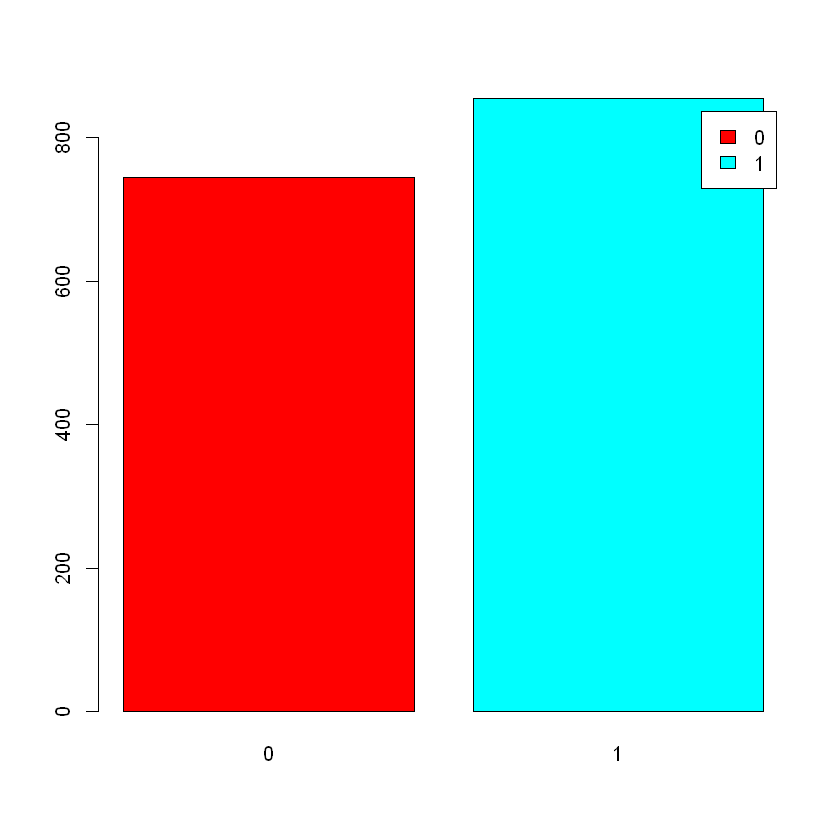

In [5]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T,col=rainbow(2))

In [7]:
library(ROSE)
#언더샘플링
df_samp<-ovun.sample(class~., data=df, seed=1, method='under',
                    N=744*2)$data
(tbl<-table(df_samp$class))


  0   1 
744 744 

In [8]:
#학습용:검증용 데이터셋 구분
library(caret)
set.seed(123)
idx_train<-createDataPartition(y=df_samp$class,p=0.8,list=F)
train<-df_samp[idx_train,]
X_train<-train[,-12]
y_train<-train[,12]
test<-df_samp[-idx_train,]
X_test<-test[,-12]
y_test<-test[,12]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Warning message:
"package 'reshape' was built under R version 3.6.2"
Attaching package: 'reshape'

The following object is masked from 'package:dplyr':

    rename

Using  as id variables


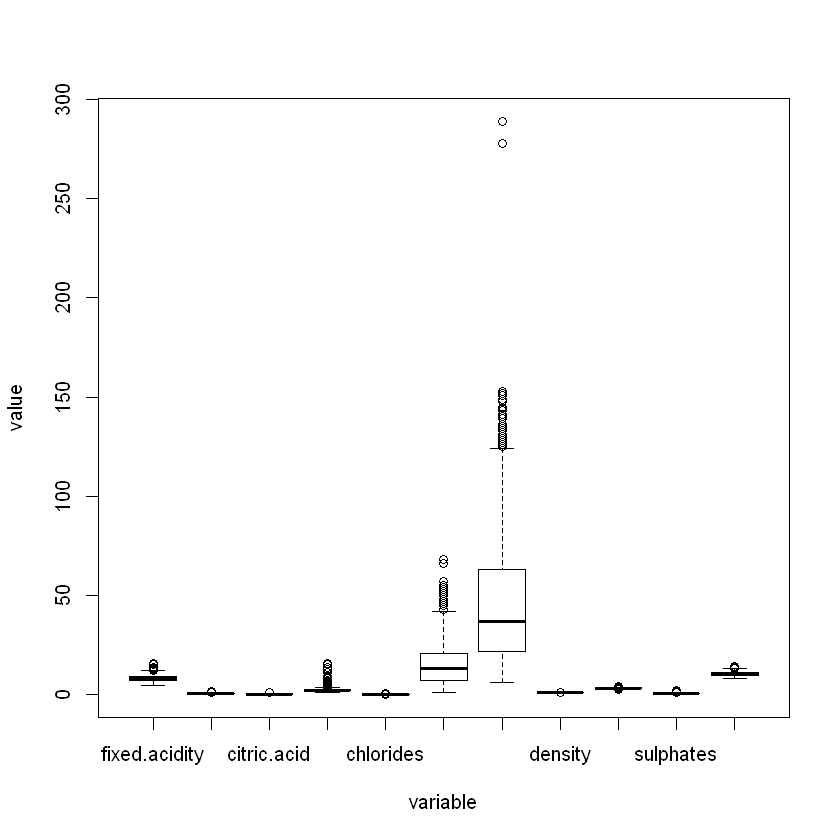

In [12]:
library(reshape)
meltData<-melt(X_train)
boxplot(data=meltData, value~variable)

In [14]:
X_train_scaled<-as.data.frame(scale(X_train))
X_test_scaled<-as.data.frame(scale(X_test))
train_scaled<-cbind(X_train_scaled,class=y_train)
test_scaled<-cbind(X_test_scaled,class=y_test)

Using  as id variables


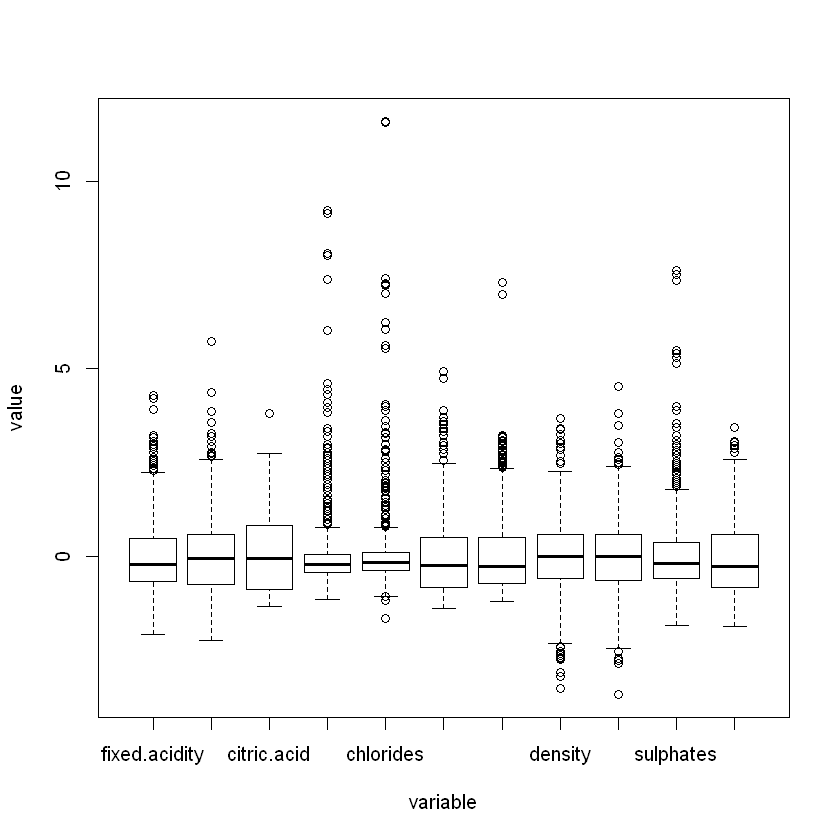

In [16]:
meltData<-melt(X_train_scaled)
boxplot(data=meltData, value~variable)

In [17]:
#로지스틱 회귀분석 모형
model<-glm(class ~ . , data=train_scaled, family=binomial)
summary(model)


Call:
glm(formula = class ~ ., family = binomial, data = train_scaled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4199  -0.8292   0.0135   0.8239   2.2963  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           0.04615    0.07118   0.648   0.5167    
fixed.acidity         0.34531    0.19336   1.786   0.0741 .  
volatile.acidity     -0.67393    0.10532  -6.399 1.57e-10 ***
citric.acid          -0.30546    0.12731  -2.399   0.0164 *  
residual.sugar        0.12293    0.08734   1.408   0.1593    
chlorides            -0.15708    0.08738  -1.798   0.0722 .  
free.sulfur.dioxide   0.21747    0.10154   2.142   0.0322 *  
total.sulfur.dioxide -0.48836    0.11130  -4.388 1.14e-05 ***
density              -0.11196    0.17487  -0.640   0.5220    
pH                    0.05408    0.12918   0.419   0.6755    
sulphates             0.48064    0.08783   5.472 4.45e-08 ***
alcohol               0.88174    0.12586   7.006 2.46e-

In [18]:
#후진제거법
reduced<-step(model,direction='backward')

Start:  AIC=1260.25
class ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + pH + sulphates + alcohol

                       Df Deviance    AIC
- pH                    1   1236.4 1258.4
- density               1   1236.7 1258.7
- residual.sugar        1   1238.2 1260.2
<none>                      1236.2 1260.2
- fixed.acidity         1   1239.5 1261.5
- chlorides             1   1239.7 1261.7
- free.sulfur.dioxide   1   1240.8 1262.8
- citric.acid           1   1242.1 1264.1
- total.sulfur.dioxide  1   1256.6 1278.6
- sulphates             1   1269.8 1291.8
- volatile.acidity      1   1282.7 1304.7
- alcohol               1   1288.6 1310.6

Step:  AIC=1258.43
class ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + 
    chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    density + sulphates + alcohol

                       Df Deviance    AIC
- density              

In [19]:
#svm모형
library(e1071)
set.seed(123)
tune.out<-tune(svm,class ~ fixed.acidity + volatile.acidity + citric.acid + chlorides + 
    free.sulfur.dioxide + total.sulfur.dioxide + sulphates + 
    alcohol , data=train_scaled,
              range=list(cost=c(0.001,0.01,0.1,1,10),
              gamma=c(0.0001,0.001,0.01,0.1)))
summary(tune.out)
#최적 cost 1 ,gamma 0.1


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.181721 

- Detailed performance results:
    cost gamma     error dispersion
1  1e-03 1e-04 0.4885814 0.02380509
2  1e-02 1e-04 0.4863781 0.02394061
3  1e-01 1e-04 0.4654517 0.02484114
4  1e+00 1e-04 0.2988533 0.02986201
5  1e+01 1e-04 0.1880338 0.02206953
6  1e-03 1e-03 0.4864382 0.02393019
7  1e-02 1e-03 0.4659873 0.02475604
8  1e-01 1e-03 0.3021829 0.02968274
9  1e+00 1e-03 0.1877179 0.02231868
10 1e+01 1e-03 0.1884800 0.02248655
11 1e-03 1e-02 0.4703211 0.02400621
12 1e-02 1e-02 0.3307566 0.02677816
13 1e-01 1e-02 0.1856538 0.02261387
14 1e+00 1e-02 0.1836934 0.02396166
15 1e+01 1e-02 0.1822010 0.02308736
16 1e-03 1e-01 0.4401961 0.02170782
17 1e-02 1e-01 0.1972740 0.02065553
18 1e-01 1e-01 0.1829156 0.02391237
19 1e+00 1e-01 0.1817210 0.02756894
20 1e+01 1e-01 0.1904223 0.03264044


In [20]:
#최적의 svm 모형
bestmodel<-tune.out$best.model
summary(bestmodel)


Call:
best.tune(method = svm, train.x = class ~ fixed.acidity + volatile.acidity + 
    citric.acid + chlorides + free.sulfur.dioxide + total.sulfur.dioxide + 
    sulphates + alcohol, data = train_scaled, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 10), gamma = c(1e-04, 0.001, 0.01, 0.1)))


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  911






In [21]:
#학습용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_train_scaled)
result<-round(pred)
table(y_train,result)
mean(y_train==result)

       result
y_train   0   1
      0 488 108
      1 165 431

[1] 0.7709732

In [22]:
#검증용 데이터셋으로 모형의 성능 확인
pred<-predict(bestmodel,X_test_scaled)
result<-round(pred)
table(y_test,result)
mean(y_test==result)

      result
y_test   0   1
     0 117  31
     1  40 108

[1] 0.7601351